In [300]:
name = "Renê Eduardo Pereira Cardozo"  # write YOUR NAME

honorPledge = "I affirm that I have not given or received any unauthorized " \
              "help on this assignment, and that this work is my own.\n"


print("\nName: ", name)
print("\nHonor pledge: ", honorPledge)



Name:  Renê Eduardo Pereira Cardozo

Honor pledge:  I affirm that I have not given or received any unauthorized help on this assignment, and that this work is my own.



In [301]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

%matplotlib inline

In [302]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori) = mnist.load_data()

print(X_train_ori.shape, y_train_ori.shape)
print(X_test_ori.shape, y_test_ori.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


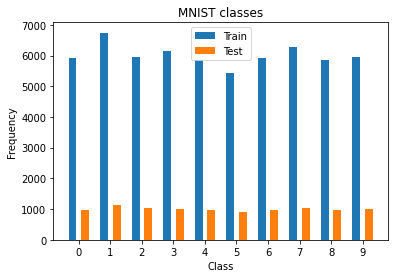

In [303]:
labels = ["%s"%i for i in range(10)]

unique, counts = np.unique(y_train_ori, return_counts=True)
uniquet, countst = np.unique(y_test_ori, return_counts=True)

fig, ax = plt.subplots()
rects1 = ax.bar(unique - 0.2, counts, 0.25, label='Train')
rects2 = ax.bar(unique + 0.2, countst, 0.25, label='Test')
ax.legend()
ax.set_xticks(unique)
ax.set_xticklabels(labels)

plt.title('MNIST classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

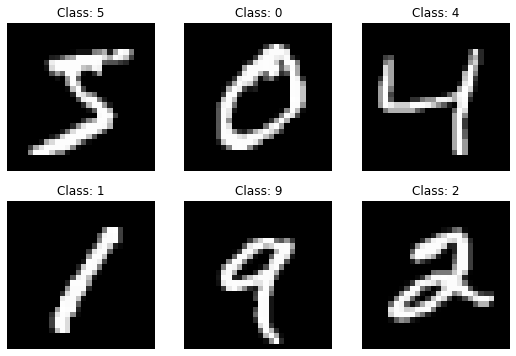

In [304]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train_ori[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_ori[i])
    
plt.show()

In [305]:
# Reduce the image size to its half 
X_train = np.array([image[::2, 1::2] for image in X_train_ori])
X_test  = np.array([image[::2, 1::2] for image in X_test_ori])

y_train = y_train_ori
y_test = y_test_ori

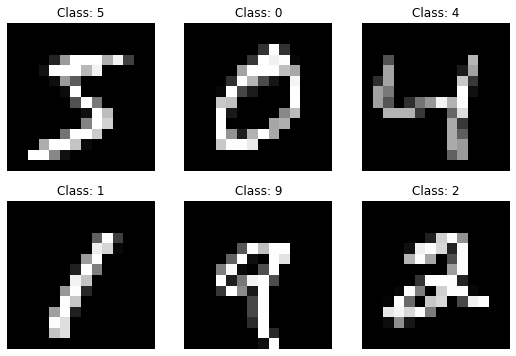

In [306]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_ori[i])
    
plt.show()

In [307]:
X_train = (X_train/255.0).astype('float32').reshape((60000,14*14))
X_test = (X_test/255.0).astype('float32').reshape((10000,14*14))

print(X_train.dtype)
print(X_test.dtype)

print("\nShape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

print("\nMinimum value in X_train:", np.amin(X_train))
print("Maximum value in X_train:", np.amax(X_train))

print("\nMinimum value in X_test:", np.amin(X_test))
print("Maximum value in X_test:", np.amax(X_test))


float32
float32

Shape of X_train:  (60000, 196)
Shape of X_test:  (10000, 196)

Minimum value in X_train: 0.0
Maximum value in X_train: 1.0

Minimum value in X_test: 0.0
Maximum value in X_test: 1.0


In [308]:
###########
# ETAPA 2 #
###########

In [309]:
from sklearn.model_selection import StratifiedShuffleSplit

# Guardando os valores originais para uso na etapa 4
x_final = X_train
y_final = y_train

# Realiza a separação entre treinamento e validação
strat = StratifiedShuffleSplit(n_splits=2, train_size = 0.7)
print(X_train.shape)
print(y_train.shape)
index1, index2 = strat.split(X_train, y_train)

x_train, x_validation = X_train[index1[0]], X_train[index1[1]]
y_train, y_validation = y_train[index1[0]], y_train[index1[1]]


(60000, 196)
(60000,)


In [278]:
# Demonstra que a separação foi de fato estratificada:
np.set_printoptions(precision=4)
print("\nTraining Set:")
print("Shape:")
print(x_train.shape, y_train.shape)
print("Proportion:")
print(np.bincount(y_train)/y_train.size)

print("\nValidation Set:")
print("Shape:")
print(x_validation.shape, y_validation.shape)
print("Proportion:")
print(np.bincount(y_validation)/y_validation.size)


Training Set:
Shape:
(42000, 196) (42000,)
Proportion:
[0.0987 0.1124 0.0993 0.1022 0.0974 0.0904 0.0986 0.1044 0.0975 0.0991]

Validation Set:
Shape:
(18000, 196) (18000,)
Proportion:
[0.0987 0.1124 0.0993 0.1022 0.0974 0.0903 0.0986 0.1044 0.0975 0.0992]


In [ ]:
# Os modelos serão comparados tendo como referência sua acurácia, a qual é
# retornada pelo método score() de cada método utilizado. Serão utilizados
# os parâmetros padrões para cada método, bem como será executada uma busca
# pelos melhores parâmetros utilizando a classe HalvingGridSearchCV().
# Apenas a maior acurácia entre os modelos obtidos pela busca, retornada pelo
# atributo best_score_, será utilizada como comparação para os parâmetros padrões.

# Para cada método utilizado será selecionado um único modelo para ser utilizado 
# na Etapa 3

In [279]:
from sklearn.linear_model import LogisticRegression
LogisticRegression
logistic = LogisticRegression(max_iter=1000, n_jobs=-1)
logistic.fit(x_train, y_train)
logistic.score(x_validation, y_validation)


0.9122222222222223

In [280]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

grid={"C":np.logspace(-3,3,7)}
logistic_search = HalvingGridSearchCV(logistic, grid, n_jobs=-1)
logistic_search.fit(x_train, y_train)

HalvingGridSearchCV(estimator=LogisticRegression(max_iter=1000, n_jobs=-1),
                    n_jobs=-1,
                    param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
                    refit=<function _refit_callable at 0x7f0704b325e0>)

In [281]:
print("Best C from search: {}".format(logistic_search.best_params_))
print("Best score from search: {}".format(logistic_search.best_score_))

Best C from search: {'C': 10.0}
Best score from search: 0.9078333333333333


In [282]:
# Comparando os scores utilizando o parâmetro C das buscas com o padrão da Regressão Logística,
# temos que os parâmetros padrões possuem melhor resultado. Assim, este será o modelo utilizado
# para realizar comparações com outros métodos.

In [283]:
from sklearn.neural_network import MLPClassifier
neural_network = MLPClassifier(max_iter=1000)
neural_network.fit(x_train, y_train)

MLPClassifier(max_iter=1000)

In [284]:
print(neural_network.score(x_validation, y_validation))

0.9722222222222222


In [285]:
neural_grid = {'hidden_layer_sizes': [(10,), (25,), (50,), (100,), (10,2), (25,2), (50,2), (100,2)],
              'activation': ['tanh', 'relu'],
              'alpha': [0.1, 0.05, 0.001, 0.0005, 0.0001]}
neural_search = HalvingGridSearchCV(neural_network, neural_grid, n_jobs=-1)
neural_search.fit(x_train, y_train)

HalvingGridSearchCV(estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
                    param_grid={'activation': ['tanh', 'relu'],
                                'alpha': [0.1, 0.05, 0.001, 0.0005, 0.0001],
                                'hidden_layer_sizes': [(10,), (25,), (50,),
                                                       (100,), (10, 2), (25, 2),
                                                       (50, 2), (100, 2)]},
                    refit=<function _refit_callable at 0x7f0704b325e0>)

In [286]:
print('Best Params from search: {}'.format(neural_search.best_params_))
print('Best Score from search: {}'.format(neural_search.best_score_))

Best Params from search: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,)}
Best Score from search: 0.9710134571870906


In [287]:
# Comparando os scores do classficador padrão com os realizados pelas buscas, temos que
# o melhor modelo utiliza os parâmetros:
# ativador: relu
# alpha: 0.05
# hiden_layer_sizes: (100,)
# Portanto, este será o modelo utilizado para realizar a comparação com outros métodos.

In [288]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

SVC()

In [289]:
print(svm_model.score(x_validation, y_validation))

0.9748888888888889


In [290]:
svm_grid = {'C': np.logspace(-3,3,7), 'gamma': np.logspace(-5,1,6), 'kernel': ['rbf', 'poly', 'sigmoid']}
svm_search = HalvingGridSearchCV(svm_model, svm_grid, n_jobs=-1)
svm_search.fit(x_train, y_train)

HalvingGridSearchCV(estimator=SVC(), n_jobs=-1,
                    param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                'gamma': array([1.0000e-05, 1.5849e-04, 2.5119e-03, 3.9811e-02, 6.3096e-01,
       1.0000e+01]),
                                'kernel': ['rbf', 'poly', 'sigmoid']},
                    refit=<function _refit_callable at 0x7f0704b325e0>)

In [291]:
print(svm_search.best_estimator_)
print(svm_search.best_score_)

SVC(C=10.0, gamma=0.03981071705534969)
0.9747825050649507


In [292]:
# O melhor score foi encontrado pela busca, utilizando os parãmetros:
# C = 10.0
# gamma = 0.03981071705534969
# Portanto, este será o modelo utilizado para realizar a comparação com outros métodos.

In [ ]:
###########
# ETAPA 3 #
###########

In [293]:
# Modelos finais:

final_logistic_regression = LogisticRegression(max_iter=1000, n_jobs=-1);
final_neural_network = MLPClassifier(activation='relu', alpha=0.05, hidden_layer_sizes=(100,), max_iter=1000)
final_svm_model = svm.SVC(C = 10.0, gamma = 0.03981071705534969)

In [294]:
# Treinamento dos modelos

final_logistic_regression.fit(x_train, y_train)
final_neural_network.fit(x_train, y_train)
final_svm_model.fit(x_train, y_train)

SVC(C=10.0, gamma=0.03981071705534969)

In [295]:
# Seleção do melhor modelo baseado na performance com relação ao conjunto de validação

print("Logistic Regression Score: {}".format(final_logistic_regression.score(x_validation, y_validation)))
print("Neural Network Score: {}".format(final_neural_network.score(x_validation, y_validation)))
print("SVM Score: {}".format(final_svm_model.score(x_validation, y_validation)))

Logistic Regression Score: 0.9122222222222223
Neural Network Score: 0.9738888888888889
SVM Score: 0.9781111111111112


In [296]:
# O método escolhido foi o SVM
# Avaliando-o no conjunto de testes, temos:

print("SVM Score: {}".format(final_svm_model.score(X_test, y_test)))

SVM Score: 0.9771


In [297]:
# A performance do SVM foi ainda melhor no conjunto de testes do que no conjunto
# de validação. O que comprova que o modelo possui alta capacidade preditiva.

y_predicted = final_svm_model.predict(X_test)

In [ ]:
###########
# ETAPA 4 #
###########

In [298]:
# Calculado o erro do modelo de acordo:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

print("Erro da predição: {}".format(mean_squared_error(y_test, y_predicted, squared=False)))

Erro da predição: 0.6899275324264136


In [312]:
# Realizando o treinamento novamente, porém agora utilizando o conjunto de treinamento
# e o conjunto de validação juntos.
final2_svm_model = svm.SVC(C = 10.0, gamma = 0.03981071705534969)
final2_svm_model.fit(x_final, y_final)

SVC(C=10.0, gamma=0.03981071705534969)

In [315]:
print("SVM Score - Train + Validation: {}".format(final2_svm_model.score(X_test, y_test)))
y_final_pred = final2_svm_model.predict(x_final)
print("Erro da predição: {}".format(mean_squared_error(y_final, y_final_pred, squared=False)))

SVM Score - Train + Validation: 0.9805
Erro da predição: 0.18307557637944682


In [314]:
# A diferença entre o treinamento do modelo utilizando apenas o conjunto de treinamento
# para com o treinamento utilizando o conjunto de treinamento + validação é 
# cerca de 0.03 na acurácia do modelo. A adição de mais 18000 dados teve pouca influência
# no score do modelo.

# Contudo, pode-se perceber uma diminuição no erro de cerca de 0.5, o que indica que o modelo
# está muito mais acurado.